In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import joblib
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_regression
from sklearn import svm
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

heart_failure = pd.read_csv("Heart_Failure.csv")


heart_failure.shape

def printMetrics(a,r,f,p):
    print("Accuracy : ",format(a,".3f"), "Recall : ", format(r, ".3f"),  "F-score : ",format(f, ".3f"), "Precision: ",format(p, ".3f"))


## For seeing the Values in 2D Array

In [2]:
heart_failure.values

array([[7.500e+01, 0.000e+00, 5.820e+02, ..., 0.000e+00, 4.000e+00,
        1.000e+00],
       [5.500e+01, 0.000e+00, 7.861e+03, ..., 0.000e+00, 6.000e+00,
        1.000e+00],
       [6.500e+01, 0.000e+00, 1.460e+02, ..., 1.000e+00, 7.000e+00,
        1.000e+00],
       ...,
       [4.500e+01, 0.000e+00, 2.060e+03, ..., 0.000e+00, 2.780e+02,
        0.000e+00],
       [4.500e+01, 0.000e+00, 2.413e+03, ..., 1.000e+00, 2.800e+02,
        0.000e+00],
       [5.000e+01, 0.000e+00, 1.960e+02, ..., 1.000e+00, 2.850e+02,
        0.000e+00]])

## For Computing the summary of statistics pertaining to the DataFrame columns

In [3]:
heart_failure.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## For seeing the first (5 by default) rows of a data frame or series.

In [4]:
heart_failure.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## For learning the datatypes and the row count for each attribute in the dataset

In [5]:
heart_failure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


## For checking the values in the database is null or not and adding if there are any null values.

In [6]:
heart_failure.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

## For checking not null values

In [7]:
heart_failure.notnull()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,True,True,True,True,True,True,True,True,True,True,True,True,True
295,True,True,True,True,True,True,True,True,True,True,True,True,True
296,True,True,True,True,True,True,True,True,True,True,True,True,True
297,True,True,True,True,True,True,True,True,True,True,True,True,True


## For splitting the data set into training set and test test. 
80% of the data is allocated to training set and 20% for test set random state is used inorder to seed the random generator, so that  train-test splits are always deterministic.

In [8]:
X = heart_failure.drop(columns = ["DEATH_EVENT"])
y = heart_failure["DEATH_EVENT"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .2, random_state = 42)

# DecisionTree 

In [9]:
model1 = DecisionTreeClassifier()
model1.fit(X_train,y_train)

DecisionTreeClassifier()

In [10]:
prediction = model1.predict(X_test)
model1_accuracy = accuracy_score(y_test,prediction)
model1_recall = recall_score(y_test,prediction)
model1_fscore = f1_score(y_test,prediction)
model1_precision = precision_score(y_test,prediction)


                        
printMetrics(model1_accuracy, model1_recall, model1_fscore, model1_precision)

Accuracy :  0.750 Recall :  0.481 F-score :  0.559 Precision:  0.667


## KNN
When k=3

In [11]:
k = 3

model2 = KNeighborsClassifier(n_neighbors = k)
model2.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=3)

In [12]:
prediction = model2.predict(X_test)
model2_accuracy = accuracy_score(y_test,prediction)
model2_recall = recall_score(y_test,prediction)
model2_fscore = f1_score(y_test,prediction)
model2_precision = precision_score(y_test,prediction)
model2_precision = precision_score(y_test,prediction)
                        
printMetrics(model2_accuracy, model2_recall, model2_fscore, model2_precision)

Accuracy :  0.646 Recall :  0.165 F-score :  0.234 Precision:  0.406


## RANDOM FOREST

In [13]:
model3 = RandomForestClassifier()

model3.fit(X_train,y_train)

RandomForestClassifier()

In [14]:
prediction = model3.predict(X_test)

model3_accuracy = accuracy_score(y_test,prediction)
model3_recall = recall_score(y_test,prediction)
model3_fscore = f1_score(y_test,prediction)
model3_precision = precision_score(y_test,prediction)

                        
printMetrics(model3_accuracy, model3_recall, model3_fscore, model3_precision)

Accuracy :  0.825 Recall :  0.582 F-score :  0.687 Precision:  0.836


## LogisticRegression

In [15]:
model4 = LogisticRegression()
model4.fit(X_train,y_train)

LogisticRegression()

In [16]:
prediction = model4.predict(X_test)

model4_accuracy = accuracy_score(y_test,prediction)
model4_recall = recall_score(y_test,prediction)
model4_fscore = f1_score(y_test,prediction)
model4_precision = precision_score(y_test,prediction)


                        
printMetrics(model4_accuracy, model4_recall, model4_fscore, model4_precision)

Accuracy :  0.771 Recall :  0.405 F-score :  0.538 Precision:  0.800


## Visualization

Comparison of metric values for the included models

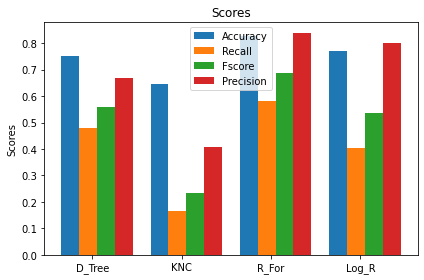

In [17]:
labels = ['D_Tree', 'KNC', 'R_For', 'Log_R']
Acc = [model1_accuracy,model2_accuracy,model3_accuracy,model4_accuracy]
Rec = [model1_recall,model2_recall,model3_recall,model4_recall]
Fsc = [model1_fscore,model2_fscore, model3_fscore, model4_fscore]
Pre = [model1_precision,model2_precision,model3_precision,model4_precision,]

fig, ax = plt.subplots()
x = np.arange(len(labels))
width = 0.2
rects1 = ax.bar(x - width - width/4, Acc, width, label='Accuracy')
rects2 = ax.bar(x - width * 1/4, Rec, width, label='Recall')
rects3 = ax.bar(x + width*3/4, Fsc, width, label='Fscore')
rects4 = ax.bar(x + width + width*3/4, Pre, width, label='Precision')


ax.set_ylabel('Scores')
ax.set_title('Scores')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

# Conclusions
RandomForrest seems to be the most accurate model amongst the ones used. All four metrics scores accuracry, recall, f-score and precisions testify that RandomForrest is the most performing model for this dataset. 